# example.py

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


'''
원본 이미지
'''
img = cv2.imread('hand.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height = img.shape[0]
width = img.shape[1]
print('height:', height)
print('width:', width, end='\n\n')

plt.figure(figsize=(17, 4))

plt.subplot(1, 4, 1)
plt.imshow(img)
plt.axis('off')
plt.title('original')


'''
1) 이동 변환 (translation)
'''
tran_M = np.float32([[1, 0, 50],
                     [0, 1, 100]])
translated = cv2.warpAffine(img, tran_M, (width, height))
print('>> Translation matrix')
print(tran_M, end='\n\n')

plt.subplot(1, 4, 2)
plt.imshow(translated)
plt.axis('off')
plt.title('translation')


'''
2) 크기 변환 (scaling)
'''
scale_M = cv2.getRotationMatrix2D((0, 0), 0, 1.5)
scaled = cv2.warpAffine(img, scale_M, (width, height))
print('>> Scaling matrix')
print(scale_M, end='\n\n')

plt.subplot(1, 4, 3)
plt.imshow(scaled)
plt.axis('off')
plt.title('scaling')


'''
3) 회전 변환 (rotation)
'''
# OpenCV를 이용한 회전 변환
center = (width / 2, height / 2)
rot_M = cv2.getRotationMatrix2D(center, 90, 1.0)  # 회전 방향이 반시계방향(CCW; Counter Clock-Wise)
rotated = cv2.warpAffine(img, rot_M, (width, height))
print('>> OpenCV Rotation matrix')
print(rot_M, end='\n\n')

plt.subplot(1, 4, 4)
plt.imshow(rotated)
plt.axis('off')
plt.title('rotation')

# figure 출력
plt.tight_layout()
plt.show()


# geometric_transform.py

>> OpenCV Rotation matrix
[[ 6.123234e-17  1.000000e+00  7.300000e+01]
 [-1.000000e+00  6.123234e-17  4.390000e+02]]

>> My matrix
[[ 6.123234e-17  1.000000e+00  7.300000e+01]
 [-1.000000e+00  6.123234e-17  4.390000e+02]
 [ 0.000000e+00  0.000000e+00  1.000000e+00]]


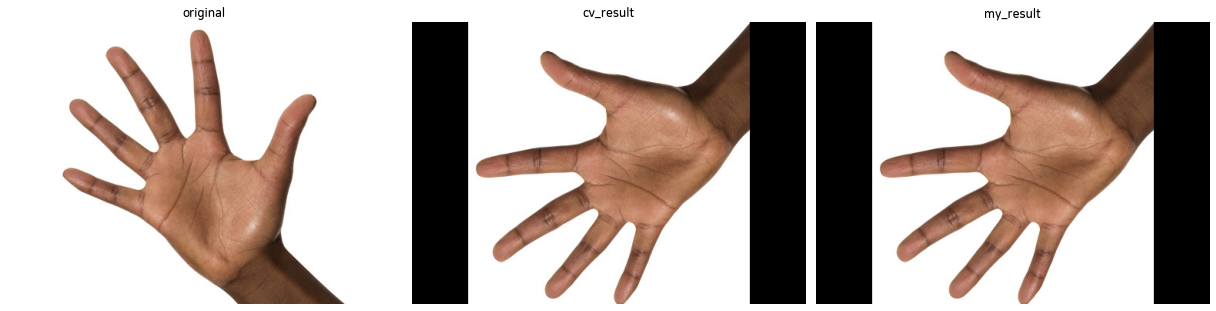

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, pi

plt.figure(figsize=(17, 5))

img = cv2.imread('hand.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height = img.shape[0]
width = img.shape[1]
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.axis('off')
plt.title('original')


# OpenCV를 이용한 변환 행렬 도출
center = (width / 2, height / 2)
cv_M = cv2.getRotationMatrix2D(center, 90, 1.0)  # 회전 방향이 반시계방향(CCW; Counter Clock-Wise)
cv_result = cv2.warpAffine(img, cv_M, (width, height))
print('>> OpenCV Rotation matrix')
print(cv_M, end='\n\n')

plt.subplot(1, 3, 2)
plt.imshow(cv_result)
plt.axis('off')
plt.title('cv_result')


# 행렬 구하기 위한 변수
h,w,_ = img.shape
center = (height/2,width/2) # y,x
theta = -pi/2

# 원점 복귀 행렬
m1 = np.array([[1, 0, center[1]],
               [0, 1, center[0]],
               [0, 0, 1]])

# 회전 변환 행렬
m2 = np.array([[cos(theta), -sin(theta), 0],
               [sin(theta),  cos(theta), 0],
               [0        ,          0, 1]])

# 원점 이동 행렬
m3 = np.array([[1, 0, -center[1]],
               [0, 1, -center[0]],
               [0, 0, 1]])

my_M = m1@m2@m3
print('>> My matrix')
print(my_M)
my_result = cv2.warpAffine(img, my_M[:2,], (width, height))

plt.subplot(1, 3, 3)
plt.imshow(my_result)
plt.axis('off')
plt.title('my_result')

# figure 출력
plt.tight_layout()
plt.show()

In [ ]:
from math import cos, sin, pi

h,w,_ = img.shape
center = (h/2,w/2) # y,x
theta = -pi/2

# 원점 복귀 행렬
m1 = np.array([[1, 0, center[1]],
               [0, 1, center[0]],
               [0, 0, 1]])

# 회전 변환 행렬
m2 = np.array([[cos(theta), -sin(theta), 0],
               [sin(theta),  cos(theta), 0],
               [0        ,          0, 1]])

# 원점 이동 행렬
m3 = np.array([[1, 0, -center[1]],
               [0, 1, -center[0]],
               [0, 0, 1]])

my_M = m1@m2@m3

print('>> My matrix')
print(my_M)
my_result = cv2.warpAffine(img, my_M[:2], (w, h))
plt.imshow(my_result)
plt.axis('off')
plt.title('my_result')

plt.show()